# Amazon Reviews Sentiment Analysis
<p><strong>Hypothesis:</strong> does positive reviews lead to high rankings? & high sales? </p>
    does # of reviews lead to high rankings? 
<p><strong>Exploratory Data Anaalysis</strong>
<p><strong>Sentiment Classifeir</strong>
<p><strong>Data Set:</strong> Amazon fashion (Clothing, shoes and jewlery category) from 2016 - 2018 </p>

In [1]:
import re
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
# Dataframe
import pandas as pd
# Array
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

import string

from collections import Counter
from sklearn import svm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

import logging
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors

In [102]:
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evashuyuwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import os
os.getcwd()

'/Users/evashuyuwang/Desktop/DS_Prep_OA/DS4A/project'

In [4]:
# Load and convert compressed file to dataframe
def parse_gz(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def convert_to_DF(path):
    i = 0
    df = {}
    for d in parse_gz(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
meta_amzn = convert_to_DF('/Users/evashuyuwang/Downloads/meta_AMAZON_FASHION.json.gz')
#review_amzn = convert_to_DF('/Users/evashuyuwang/Downloads/AMAZON_FASHION.json.gz')
#meta_cjs = convert_to_DF('/Users/evashuyuwang/Downloads/meta_Clothing_Shoes_and_Jewelry.json.gz')

In [6]:
print(meta_amzn.shape)
meta_amzn.head(3)

(186627, 18)


,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[],,Dante's Peak - Laserdisc,[],[],,,"[<span class=""a-text-bold"">Package Dimensions:...","16,714,561 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,630456984X
1,[],,[],,Milliongadgets(TM) Earring Safety Backs For Fi...,[],[https://images-na.ssl-images-amazon.com/image...,,,"[<span class=""a-text-bold"">ASIN:\n ...","2,081,098 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,fishhook,,7106116521
2,[],,[Educating the next generation in the responsi...,,Envirosax Kids Series Jessie &amp; Lulu,[],[],,Envirosax,"[<span class=""a-text-bold"">Product Dimensions:...","25,698,912 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,8037200124


In [7]:
review = []
with gzip.open('/Users/evashuyuwang/Downloads/AMAZON_FASHION.json.gz') as f:
    for l in f:
        review.append(json.loads(l.strip()))
review_amzn_original = pd.DataFrame.from_dict(review)

In [ ]:
'''
review = []
with gzip.open('/Users/evashuyuwang/Downloads/Clothing_Shoes_and_Jewelry.json.gz') as f:
    for l in f:
        review.append(json.loads(l.strip()))
review_cjs = pd.DataFrame.from_dict(review)
'''

In [8]:
print(review_amzn_original.shape)
review_amzn_original.head()
review_amzn = review_amzn_original.copy()

(883636, 12)


In [141]:
review_amzn.dtypes

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

In [471]:
meta_amzn.dtypes

category        float64
tech1            object
description      object
fit              object
title            object
also_buy         object
image            object
tech2            object
brand            object
feature          object
rank             object
also_view        object
details          object
main_cat         object
similar_item     object
date             object
price            object
asin             object
dtype: object

In [480]:
meta_amzn.title.value_counts()

Yoga by Epic MMA Gear Yoga Shorts - Booty Shorts                                                    56
Women's Batwing Dolman Sleeve Chiffon Bohemian Oversized Blouse                                     45
Activer Basic Ribbed Racerback Tank Top Cotton Stretch Quality Tunic Basic Junior and Plus Sizes    37
HTYS Women's One Shoulder Beadings Chiffon Bridesmaid Long Prom Dresses HY062                       34
HTYS 2016 Gradient Color Prom Evening Dress Beaded Ball Gown HY044                                  33
                                                                                                    ..
YJWAN Women's Oversize Blouse Fashion Patchwork Loose Short Sleeved T shirt                          1
I CAN'T, I HAVE HOCKEY Ladies' T-shirt / Funny Hockey Player Family Tee                              1
Ladies 7 WHITE CHAKRAS V Hoodie, XL Rainbow Stripe                                                   1
ColorMC Women's Plus Size Solid Sleeveless Asymmetrical Hem Tunic Tank To

## Data Preprocessing

In [9]:
review_amzn["reviewTime"] = pd.to_datetime(review_amzn["reviewTime"])
review_amzn = review_amzn[['asin', 'summary', 'reviewText', 'overall', 'verified','vote', 'reviewTime']]
review_amzn.head()

,asin,summary,reviewText,overall,verified,vote,reviewTime
0,7106116521,perfect replacements!!,Exactly what I needed.,5.0,True,NaN,2014-10-20
1,7106116521,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",2.0,True,3,2014-09-28
2,7106116521,My New 'Friends' !!,Love these... I am going to order another pack...,4.0,False,NaN,2014-08-25
3,7106116521,Two Stars,too tiny an opening,2.0,True,NaN,2014-08-24
4,7106116521,Three Stars,Okay,3.0,False,NaN,2014-07-27


In [10]:
review_amzn['vote'].fillna(0, inplace = True)
review_amzn.head()

,asin,summary,reviewText,overall,verified,vote,reviewTime
0,7106116521,perfect replacements!!,Exactly what I needed.,5.0,True,0,2014-10-20
1,7106116521,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",2.0,True,3,2014-09-28
2,7106116521,My New 'Friends' !!,Love these... I am going to order another pack...,4.0,False,0,2014-08-25
3,7106116521,Two Stars,too tiny an opening,2.0,True,0,2014-08-24
4,7106116521,Three Stars,Okay,3.0,False,0,2014-07-27


In [11]:
# Drop missing values
# 881K reviews after removing missing values
# dropped if any value is missing
review_amzn.dropna(inplace=True)
print(review_amzn.shape)

(881900, 7)


In [12]:
# set time range 2016 - 2018
import datetime
print(review_amzn.reviewTime.max())
print(review_amzn.reviewTime.min())
review_amzn_timesub = review_amzn[review_amzn.reviewTime > '2016-09-30 00:00:00']

2018-10-01 00:00:00
2002-11-11 00:00:00


In [13]:
print(review_amzn_timesub.reviewTime.max())
print(review_amzn_timesub.reviewTime.min())
review_amzn_timesub.shape

2018-10-01 00:00:00
2016-10-01 00:00:00


(302456, 7)

In [14]:
# number of unique products
products = review_amzn_timesub['overall'].groupby(review_amzn_timesub['asin']).count()
print("Number of Unique Products in the Amazon Category = {}".format(products.count()))

Number of Unique Products in the Amazon Category = 78786


In [15]:
review_amzn_timesub.verified.value_counts()

True     292491
False      9965
Name: verified, dtype: int64

### Meta data

In [16]:
print('number of records:',len(meta_amzn))
print('number of unique product id:',meta_amzn['asin'].nunique())

number of records: 186627
number of unique product id: 186184


In [17]:
meta_amzn.category= meta_amzn.category.apply(lambda y: np.nan if len(y)==0 else y)

In [18]:
# category
meta_amzn_2 = meta_amzn.copy()
meta_amzn_2['category'] = meta_amzn['rank'].apply(lambda y: np.nan if len(y)==0 else y.split()[2] if type(y) is str\
                                                 else y[0].split()[2])

In [19]:
meta_amzn_2['category'].value_counts()

Clothing,      178844
Sports            667
Kitchen           134
Home              116
Beauty             96
Health             83
Arts,              74
Toys               39
Office             37
Tools              36
Automotive         23
Industrial         15
Electronics        13
Cell                9
Patio,              8
Pet                 7
Amazon              5
Musical             4
Baby                1
Books               1
Grocery             1
Name: category, dtype: int64

In [20]:
meta_amzn_2 = meta_amzn_2[meta_amzn_2.category == 'Clothing,']

In [21]:
# extract sales rank, fill nan if empty list or no specific ranking available
def get_rank(y):
    if len(y)==0:
        y = np.nan
    elif type(y) is str:   
        try:
            y = int(y.split()[0].replace(',',''))  
        except:
            y = np.nan 
    else:
        try:
            y = int(y[0].split()[0].replace(',',''))  
        except:
            y = np.nan 
    return y

meta_amzn_2['sales_rank'] = meta_amzn_2['rank'].apply(get_rank)

In [22]:
meta_amzn_2 = meta_amzn_2 [meta_amzn_2 ['sales_rank'].notnull()]

In [23]:
print(meta_amzn_2.shape)
meta_amzn_2[['sales_rank','category','rank']]

(178789, 19)


,sales_rank,category,rank
0,16714561.0,"Clothing,","16,714,561 in Clothing, Shoes & Jewelry ("
1,2081098.0,"Clothing,","2,081,098 in Clothing, Shoes & Jewelry ("
2,25698912.0,"Clothing,","25,698,912 in Clothing, Shoes & Jewelry ("
3,25850143.0,"Clothing,","25,850,143 in Clothing, Shoes & Jewelry ("
4,19411377.0,"Clothing,","19,411,377 in Clothing, Shoes & Jewelry ("
...,...,...,...
186622,9835890.0,"Clothing,","9,835,890 in Clothing, Shoes & Jewelry ("
186623,11390771.0,"Clothing,","11,390,771 in Clothing, Shoes & Jewelry ("
186624,972275.0,"Clothing,","972,275 in Clothing, Shoes & Jewelry ("
186625,1964585.0,"Clothing,","1,964,585 in Clothing, Shoes & Jewelry ("


In [523]:
meta_amzn_2.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'sales_rank'],
      dtype='object')

In [24]:
meta_amzn_2 = meta_amzn_2[['category','title','brand','price', 'asin', 'sales_rank']]
meta_amzn_2.head()

,category,title,brand,price,asin,sales_rank
0,"Clothing,",Dante's Peak - Laserdisc,,,630456984X,16714561.0
1,"Clothing,",Milliongadgets(TM) Earring Safety Backs For Fi...,,,7106116521,2081098.0
2,"Clothing,",Envirosax Kids Series Jessie &amp; Lulu,Envirosax,,8037200124,25698912.0
3,"Clothing,",Envirosax Greengrocer Series Bag 7 Guava,Envirosax,,8037200221,25850143.0
4,"Clothing,",Blessed by Pope Benedetto XVI Our Lady of Guad...,Gifts by Lulee,,8279996567,19411377.0


In [25]:
# add sentiment label
review_amzn_timesub['sentiment_label'] = np.where(review_amzn_timesub['overall'] > 3, 'positive', \
                                          np.where(review_amzn_timesub['overall'] < 3, 'negative','neutral'))

In [26]:
df_eda = pd.merge(review_amzn_timesub,meta_amzn_2,on='asin',how = 'left')

In [27]:
print(df_eda.shape)
#print(review_amzn_timesub.shape)
df_eda.tail(20)

(302615, 13)


,asin,summary,reviewText,overall,verified,vote,reviewTime,sentiment_label,category,title,brand,price,sales_rank
302595,B01HJEOC9E,Three Stars,"Small fit and a bit short but I'm 5'10"" so eve...",3.0,True,0,2017-03-17,neutral,"Clothing,",ROMWE Women's Bohemian Short Sleeve V neck Lon...,,,1736074.0
302596,B01HJEOC9E,Four Stars,"Very pretty, but too open on the chest. Get bi...",4.0,True,0,2017-03-09,positive,"Clothing,",ROMWE Women's Bohemian Short Sleeve V neck Lon...,,,1736074.0
302597,B01HJEOC9E,Barely presentable....,"The dress is pretty and fits on top, which gre...",3.0,True,3,2017-02-24,neutral,"Clothing,",ROMWE Women's Bohemian Short Sleeve V neck Lon...,,,1736074.0
302598,B01HJEOC9E,Really cute dress. I bought a small and medium...,Really cute dress. I bought a small and medium...,3.0,True,0,2017-01-09,neutral,"Clothing,",ROMWE Women's Bohemian Short Sleeve V neck Lon...,,,1736074.0
302599,B01HJEOC9E,Runs very small,Ordered an XL\nFits like a M\nThe fabric is ad...,3.0,True,0,2016-11-29,neutral,"Clothing,",ROMWE Women's Bohemian Short Sleeve V neck Lon...,,,1736074.0
302600,B01HJH7JY6,strong stone,Excellent work. lots of color,5.0,True,0,2017-02-23,positive,NaN,NaN,NaN,NaN,NaN
302601,B01HJEOBN6,Five Stars,"I love this dress! It fits great, and I get co...",5.0,True,0,2017-11-15,positive,"Clothing,",ROMWE Women's Short Sleeve V neck Long Beach W...,,,2048297.0
302602,B01HJEOBN6,Super cute!,Super cute and very flattering. It also photog...,5.0,True,0,2016-12-13,positive,"Clothing,",ROMWE Women's Short Sleeve V neck Long Beach W...,,,2048297.0
302603,B01HJEOBN6,Great dress,Quality AMAZIN love the fit and looks just li...,5.0,True,0,2016-11-01,positive,"Clothing,",ROMWE Women's Short Sleeve V neck Long Beach W...,,,2048297.0
302604,B01HJEOBN6,"It is good quality, and a timeless style","This fit me very well. It is good quality, and...",5.0,True,0,2016-10-25,positive,"Clothing,",ROMWE Women's Short Sleeve V neck Long Beach W...,,,2048297.0


## Reviews data - EDA

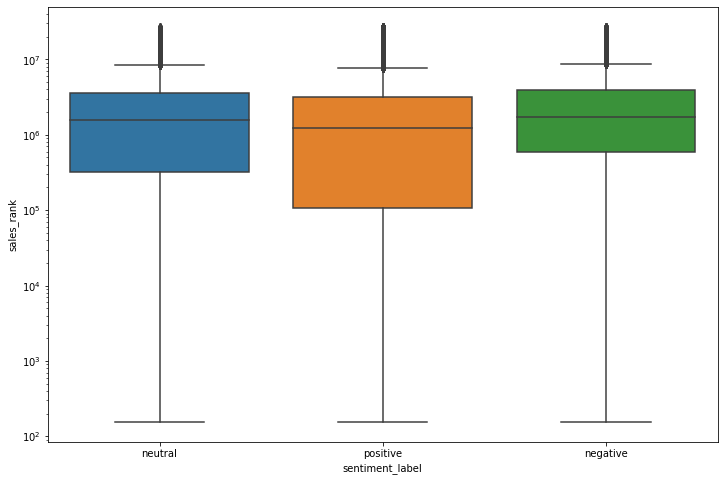

In [552]:
fig, ax=plt.subplots(figsize=(12,8))
sns.boxplot(y='sales_rank', x='sentiment_label', data=df_eda).set_yscale('log')

hypothesis: do positive reviews lead to higher sales ranking? 

run a 2-sample t test and check if means of positive and negative reviews are different

In [553]:
a=df_eda.dropna()[df_eda['sentiment_label']=="positive"]['sales_rank']
b=df_eda.dropna()[df_eda['sentiment_label']=="negative"]['sales_rank']
print(a.mean())
print(b.mean())
T,p=ttest_ind(a,b)
p


2438280.6036666567
3010652.2231301186


1.9387728211726943e-233

Although there is not enough information to conclude a causal relationahip between sales ranking and reviews sentiment, the difference of sales ranking between positive and negative reviews are significant. 

Recommendation: Getting better customer reviews by improving specific aspects of the product/services can help improve sales of a product

In [30]:
df_eda.columns

Index(['asin', 'summary', 'reviewText', 'overall', 'verified', 'vote',
       'reviewTime', 'sentiment_label', 'category', 'title', 'brand', 'price',
       'sales_rank'],
      dtype='object')

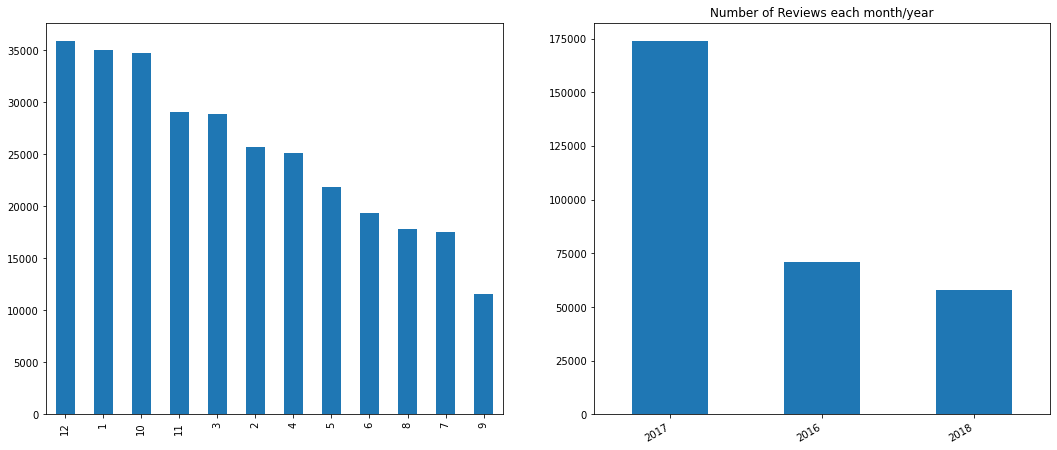

In [37]:
# seasonality
#Month of the year by number of reviews or Month by ratings
df_eda['month'] = pd.DatetimeIndex(df_eda['reviewTime']).month
df_eda['year'] = pd.DatetimeIndex(df_eda['reviewTime']).year
fig, ax=plt.subplots(1,2, figsize=(18,8))
df_eda.month.value_counts().plot.bar(ax=ax[0])
df_eda.year.value_counts().plot.bar(ax=ax[1])
plt.title("Number of Reviews each month/year")

df_eda.reviewTime.value_counts().plot()


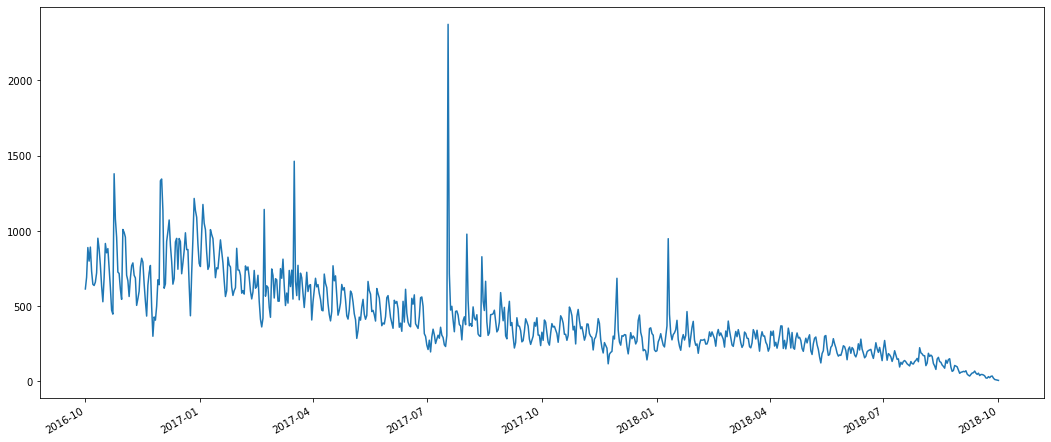

In [39]:
plt.figure(figsize=(18,8))
df_eda.reviewTime.value_counts().plot()

average ratings: 3.9061435536908946


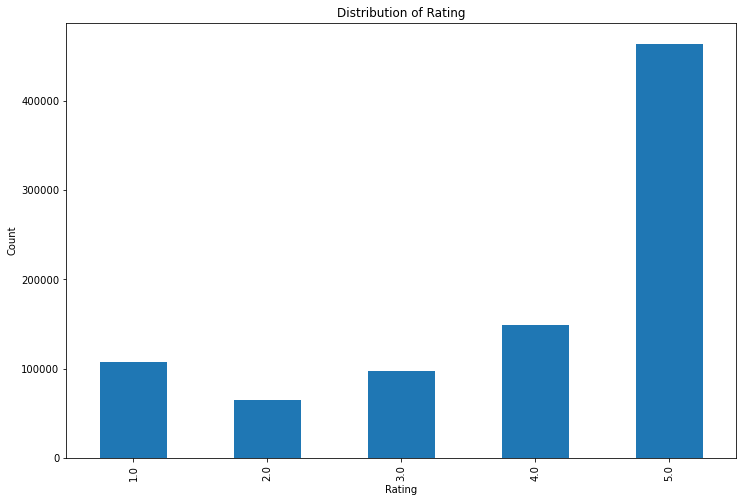

In [554]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
review_amzn['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
print('average ratings:',review_amzn['overall'].mean())

#### Top 10 brands
- number of reviews (postive vs negative reviews)
- avg ratings (higher better)
- avg sales rank (smaller better selling)

<Figure size 864x576 with 0 Axes>

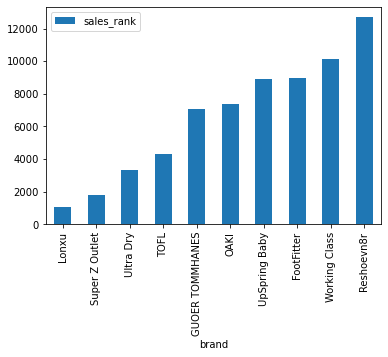

In [72]:
# plot avg sales rank for top 10 brands
brands = df_eda[df_eda.brand != ''].groupby('brand')['sales_rank'].mean().reset_index().sort_values('sales_rank')

plt.figure(figsize=(12,8))
brands[:10].plot.bar(x='brand',y='sales_rank')
#brands[:10].plot(kind='bar')
#plt.title("Avg sales rank for Top 10 Brands")

In [121]:
df_eda.sentiment_label.value_counts()

positive    214651
negative     56348
neutral      31616
Name: sentiment_label, dtype: int64

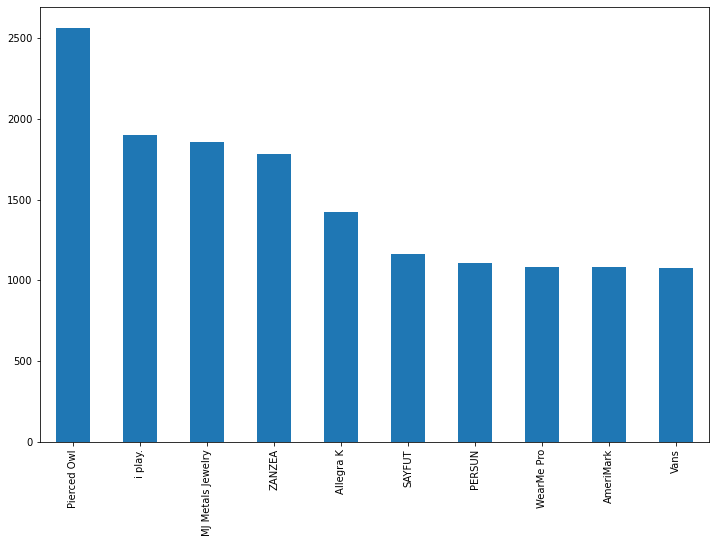

In [130]:
# Plot number of reviews for top 20 brands
brands = df_eda[df_eda.brand != '']["brand"].value_counts()

# brands.count()
plt.figure(figsize=(12,8))
brands[:10].plot(kind='bar')

Text(0, 0.5, 'Count')

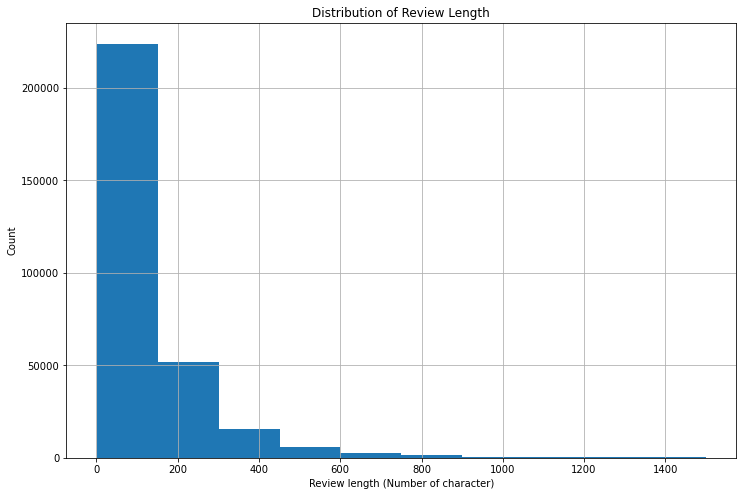

In [290]:
# Plot distribution of review length
review_length = review_amzn["reviewText"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

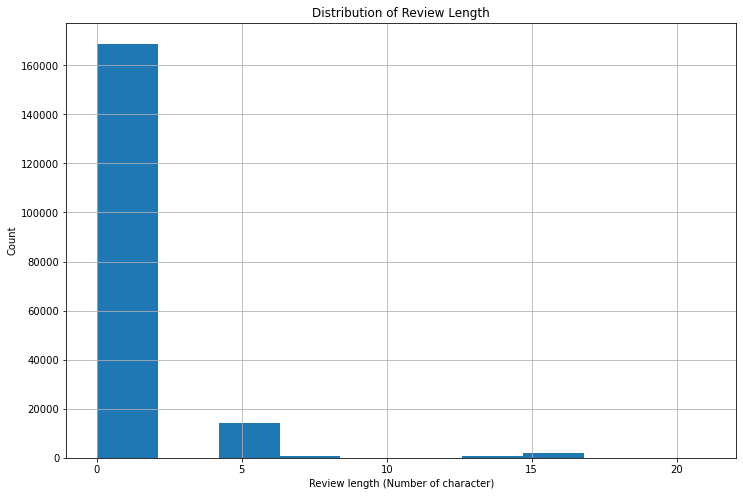

In [407]:
review_length = meta_amzn["price"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

top ranking of in clothing, shoes & jewlery 154.0


<Figure size 864x576 with 0 Axes>

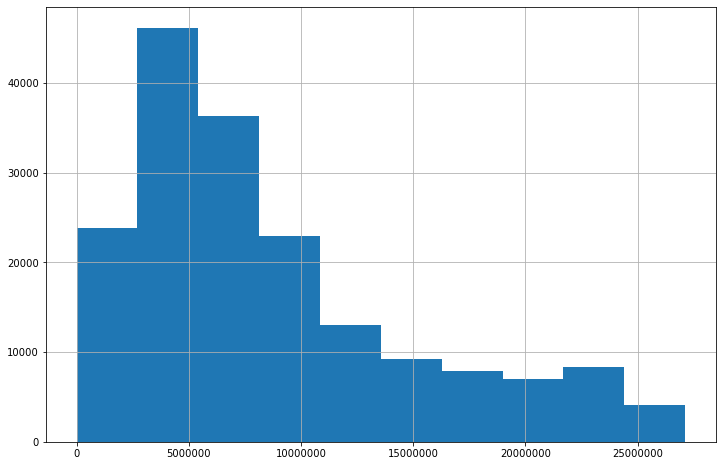

In [422]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
ax = meta_amzn_2.sales_rank.hist()
ax.ticklabel_format(useOffset=False)
ax.ticklabel_format(style='plain')
print('top ranking of in clothing, shoes & jewlery',min(meta_amzn_2.sales_rank))

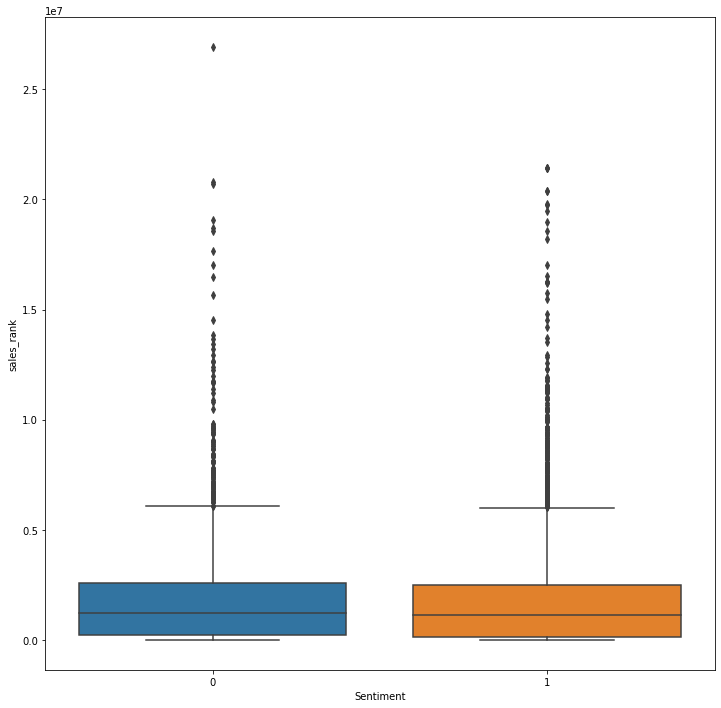

In [455]:
# sales rank vs sentiment on sample data
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.boxplot(data =df_full, x='Sentiment', y= 'sales_rank')

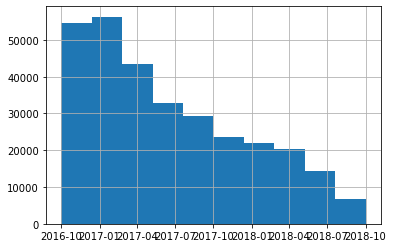

In [444]:
review_amzn.reviewTime.hist()
# avg sentiment vs year?
# 

## Reviews data - data preparation for Modeling

In [81]:
# larger sample
#440 k 
review_amzn_sample= review_amzn.sample(frac=0.2, random_state=100) #uncomment to use full set of data
print(review_amzn_sample.shape)
# Drop missing values
review_amzn_sample.dropna(inplace=True)
print(review_amzn_sample.shape)

# Remove any 'neutral' ratings equal to 3
review_amzn_sample = review_amzn_sample[review_amzn_sample['overall'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
review_amzn_sample['Sentiment'] = np.where(review_amzn_sample['overall'] > 3, 1, 0)

(176380, 7)
(176380, 7)


In [84]:
print(review_amzn_sample.shape)
print(review_amzn_sample.asin.nunique())

(156759, 8)
63916


In [78]:
df_full = pd.merge(review_amzn_sample2, meta_amzn_2,on='asin',how = 'left')

In [79]:
# group by brand 
print(df_full.shape)
#df_full.groupby('brand').sum('vote')['vote']

(785825, 13)


In [85]:
# merge meta with review
df = pd.merge(review_amzn_sample,meta_amzn_2,on='asin',how = 'left')

In [421]:
df = df.drop(columns =['details', 'tech2','details','main_cat','similar_item','date']) 
print(df.shape)
df.head(5)

(2578, 24)


asin  \
0  B019Q577XC   
1  B017LRSKZ6   
2  B01EUU5MYY   
3  B001T4MSU6   
4  B0187MPCPA   

                                                                                          summary  \
0  ... wore this dress for my birthday and it was PERFECT. 5'9 137 lbs with a small waist and ...   
1                  You get what you pay for... Garbage material, don't waste your time and money.   
2                                                                                      Five Stars   
3                                           but I am so glad I bought this and used it postpartum   
4                 The front on the shirt is like a breezy stretchy material and the back is a ...   

                                                                                                                                                                                                                                                                                                                          reviewText  \
0                                                                                                                                                                                                                     I wore this dress for my birthday and it was PERFECT.  5'9 137 lbs with a small waist and a M fit me perfectly   
1                                                                                                     This is complete garbage. Don't waste your money the material feels like something that would be used for a cheap kids' game where the velcro balls stick to the fabric. Ridiculously stupid, not worth sending back to China.   
2                                                                                                                                                                                                                                                                                                                  Love how it fits!   
3  Sizing worked perfectly as described. This was my first pregnancy so I have nothing to compare it to, but I am so glad I bought this and used it postpartum. I think it definitely played a large role in being able to return to my pre-pregnancy body. I was able to return to pre-pregnancy jeans less than a week from birth.   
4                                                                                                                                           The front on the shirt is like a breezy stretchy material and the back is a normal fabric. Looks nice. Might not be good for winter if u walk outside without a jacket. Great for summer   

   overall  verified vote      reviewerID     reviewerName reviewTime  \
0      5.0      True  109   A1V9DJ5MQGMDQ  Amazon Customer 2016-10-03   
1      1.0      True    2  A2RLSSA49ED3VP              t3j 2017-03-06   
2      4.0     False    2  A1IV3B1Y8CP2FB  Amazon Customer 2017-02-11   
3      5.0      True    2   A6WT4NUM7ZG8W  Amazon Customer 2017-05-22   
4      5.0      True    3   A2RBP2SJKH17O  Amazon Customer 2016-12-06   

   unixReviewTime  Sentiment   category tech1  \
0      1475452800          1  Clothing,         
1      1488758400          0  Clothing,         
2      1486771200          1  Clothing,         
3      1495411200          1  Clothing,         
4      1480982400          1  Clothing,         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [87]:
df.Sentiment.value_counts()

1    122450
0     34491
Name: Sentiment, dtype: int64

In [97]:
# downsampling
from sklearn.utils import resample
df_majority = df[df.Sentiment==1]
df_minority = df[df.Sentiment==0]
 
df_majority_sampled  = resample(df_majority , 
                                 replace=False,     # sample with replacement
                                 n_samples=len(df_minority),    # to match majority class
                                 random_state=123)

df_downsampled = pd.concat([df_majority_sampled, df_minority])
df_downsampled.Sentiment.value_counts()

1    34491
0    34491
Name: Sentiment, dtype: int64

In [273]:
'''
# Separate majority and minority classes
from sklearn.utils import resample
df_majority = df[df.Sentiment==1]
df_minority = df[df.Sentiment==0]
 
# Upsample minority class
df_minority_sampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1868,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Sentiment.value_counts()
'''

1    1868
0    1868
Name: Sentiment, dtype: int64

In [98]:
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df_downsampled['reviewText'], df_downsampled['Sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 62083 training examples and 6899 validation examples. 

Show a review in the training set : 
 Perchased this for my son, and needless to say, he loves it. Looks elegant, and has a nice shine to it. I would highly recommend this ring for anyone.


In [111]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [112]:
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 perchased this for my son and needless to say he loves it looks elegant and has a nice shine to it i would highly recommend this ring for anyone


### Wordcloud
In this section, we create word clouds for positive sentiment reviews and negative sentiment reviews of Amazon fashion products to get an intuition of words frequently appear in different sentiments.

In [254]:
def create_word_cloud(sentiment):
    #try: 
        #df_brand = df.loc[df['Brand Name'].isin([brand])]
        df_brand = review_amzn_sample
        df_brand_sample = df_brand.sample(frac= 1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["reviewText"]
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["reviewText"]
            
        for val in df_reviews.str.lower():
            tokens = word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        print(wordcloud)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    #except: 
    #    pass

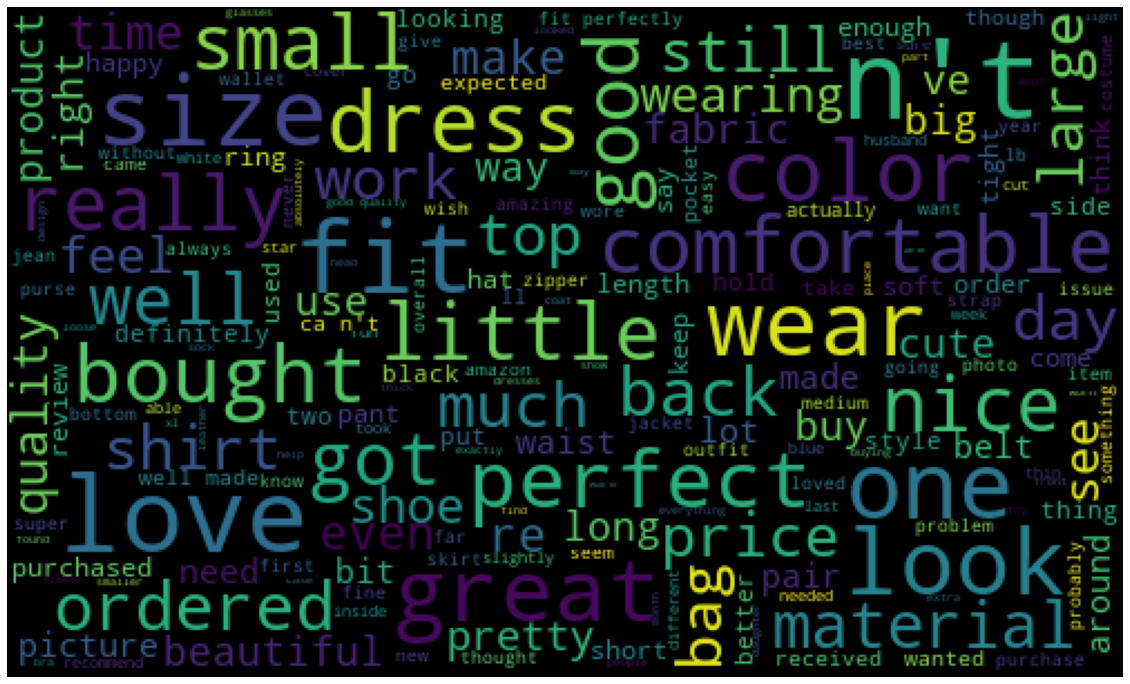

In [255]:
create_word_cloud(sentiment=1)

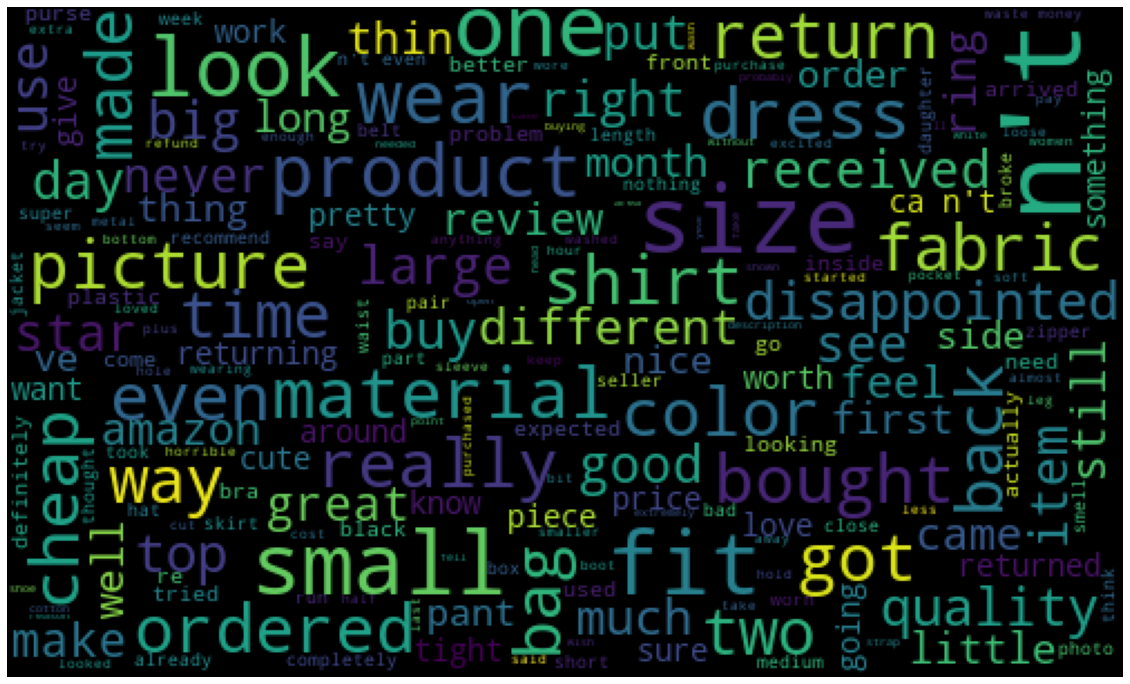

In [256]:
create_word_cloud(sentiment=0)

### CountVectorizer with Mulinomial Naive Bayes (Basline Model)

In [132]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [114]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

#Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)

Number of features : 22170 

Show some feature names : 
 ['aa', 'arse', 'blogs', 'cedar', 'connection', 'definitley', 'dusk', 'fantasie', 'gawn', 'hidious', 'island', 'linea', 'minimalistic', 'odor', 'pewter', 'push', 'reworking', 'shaply', 'specification', 'swifts', 'translate', 'vibration', 'yearly']

Accuracy on validation set: 0.9035

AUC score : 0.9033

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      3526
           1       0.90      0.90      0.90      3373

    accuracy                           0.90      6899
   macro avg       0.90      0.90      0.90      6899
weighted avg       0.90      0.90      0.90      6899


Confusion Matrix : 
 [[3204  322]
 [ 344 3029]]


In [277]:
'''
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)
'''

Number of features : 7058 

Show some feature names : 
 ['ab', 'checkout', 'entering', 'impressions', 'normal', 'revealing', 'survival', 'xlt']


MultinomialNB()

In [279]:
'''
#Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)
'''


Accuracy on validation set: 0.9198

AUC score : 0.9198

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       186
           1       0.93      0.91      0.92       188

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374


Confusion Matrix : 
 [[173  13]
 [ 17 171]]


### TfidfVectorizer with Logistic Regression

In [118]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)

Number of features : 7130 

Show some feature names : 
 ['00', 'bunches', 'drapes', 'hides', 'most', 'registry', 'strung', 'woke']

Accuracy on validation set: 0.9191

AUC score : 0.9188

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      3526
           1       0.93      0.91      0.92      3373

    accuracy                           0.92      6899
   macro avg       0.92      0.92      0.92      6899
weighted avg       0.92      0.92      0.92      6899


Confusion Matrix : 
 [[3288  238]
 [ 320 3053]]


In [115]:
'''
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)
'''

Number of features : 7130 

Show some feature names : 
 ['00', 'bunches', 'drapes', 'hides', 'most', 'registry', 'strung', 'woke']

Accuracy on validation set: 0.9191

AUC score : 0.9188

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      3526
           1       0.93      0.91      0.92      3373

    accuracy                           0.92      6899
   macro avg       0.92      0.92      0.92      6899
weighted avg       0.92      0.92      0.92      6899


Confusion Matrix : 
 [[3288  238]
 [ 320 3053]]


In [452]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:50]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-51:-1]]))


Top 10 features with smallest coefficients :
['not' 'disappointed' 'small' 'return' 'cheap' 'returning' 'money'
 'returned' 'don' 'through' 'way' 'plastic' 'completely' 'after' 'poor'
 'even' 'waste' 'broke' 'there' 'the' 'never' 'weird' 'was' 'tear'
 'already' 'fake' 'two' 'pay' 'broken' 'sizes' 'hate' 'fell' 'wrists'
 'thin' 'different' 'nothing' 'narrow' 'like' 'week' 'too' 'transparent'
 'came' 'arrived' 'barely' 'sent' 'excited' 'back' 'guess' 'material'
 'washed']

Top 10 features with largest coefficients : 
['great' 'love' 'perfect' 'well' 'little' 'comfortable' 'nice' 'good'
 'perfectly' 'fit' 'he' 'compliments' 'fits' 'beautiful' 'bit' 'my'
 'exactly' 'amazing' 'happy' 'loves' 'order' 'wearing' 'price' 'soft'
 'lbs' 'cute' 'many' 'most' 'with' 'loved' 'lot' 'comfy' 'and' 'shoes'
 'easy' 'slightly' 'lots' 'gorgeous' 'ordering' 'more' 'gift' 'best'
 'another' 'pretty' 'our' 'fast' 'though' 'have' 'just' 'as']


In [453]:
# prob score (coefficient of each review)
print(min(lr.coef_[0]))
print(max(lr.coef_[0]))

-5.347863537415149
4.841935485976953


In [282]:
'''
# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)
'''


Accuracy on validation set: 0.9118

AUC score : 0.9119

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       186
           1       0.93      0.89      0.91       188

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374


Confusion Matrix : 
 [[173  13]
 [ 20 168]]


### Fine-tuning with Gridsearch

In [116]:
# Building a pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9365

AUC score : 0.9363

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3526
           1       0.94      0.93      0.93      3373

    accuracy                           0.94      6899
   macro avg       0.94      0.94      0.94      6899
weighted avg       0.94      0.94      0.94      6899


Confusion Matrix : 
 [[3332  194]
 [ 244 3129]]


In [119]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:50]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-51:-1]]))


Top 10 features with smallest coefficients :
['not' 'disappointed' 'broke' 'poor' 'cheap' 'small' 'horrible' 'return'
 'didn' 'terrible' 'don' 'disappointing' 'cheaply' 'returning' 'waste'
 'broken' 'returned' 'fell' 'way' 'apart' 'poorly' 'barely' 'wasn' 'doesn'
 'ripped' 'awful' 'ugly' 'nothing' 'refund' '3x' 'uncomfortable' 'worst'
 'huge' 'weird' 'never' 'fake' 'pay' 'no' 'flimsy' 'sad' 'hole' 'dont'
 'useless' 'off' 'wouldn' 'short' 'away' 'too' 'upset' 'child']

Top 10 features with largest coefficients : 
['love' 'great' 'perfect' 'comfortable' 'compliments' 'perfectly' 'loves'
 'nice' 'beautiful' 'exactly' 'excellent' 'amazing' 'well' 'loved'
 'little' 'awesome' 'good' 'bit' 'cute' 'comfy' 'pleased' 'best' 'lovely'
 'nicely' 'wonderful' 'warm' 'soft' 'adorable' 'gorgeous' 'fun' 'wait'
 'slightly' 'favorite' 'happy' 'thank' 'price' 'glad' 'sexy' 'liked'
 'pretty' 'complaints' 'gift' 'fantastic' 'cool' 'satisfied' 'beat' 'just'
 'thanks' 'recommend' 'sturdy']


### Word2Vec

In [103]:
# Split review text into parsed sentences uisng NLTK's punkt tokenizer
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

62060 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['perchased', 'this', 'for', 'my', 'son', 'and', 'needless', 'to', 'say', 'he', 'loves', 'it', 'looks', 'elegant', 'and', 'has', 'a', 'nice', 'shine', 'to', 'it', 'i', 'would', 'highly', 'recommend', 'this', 'ring', 'for', 'anyone']


In [123]:
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

num_features = 3000  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-2

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 4855 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'i', 'it', 'and', 'a', 'to', 'is', 'this', 'for', 'was']


In [124]:
# Transfrom the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [125]:
# Get feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 62083 feature vectors with 3000 dimensions
Validation set : 6899 feature vectors with 3000 dimensions


In [288]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.9091

AUC score : 0.9092

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       186
           1       0.93      0.89      0.91       188

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374


Confusion Matrix : 
 [[173  13]
 [ 21 167]]


In [460]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   #index = X_train_cleaned.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)